In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
Dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
Dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=Dataset.iloc[:,[3,4]].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

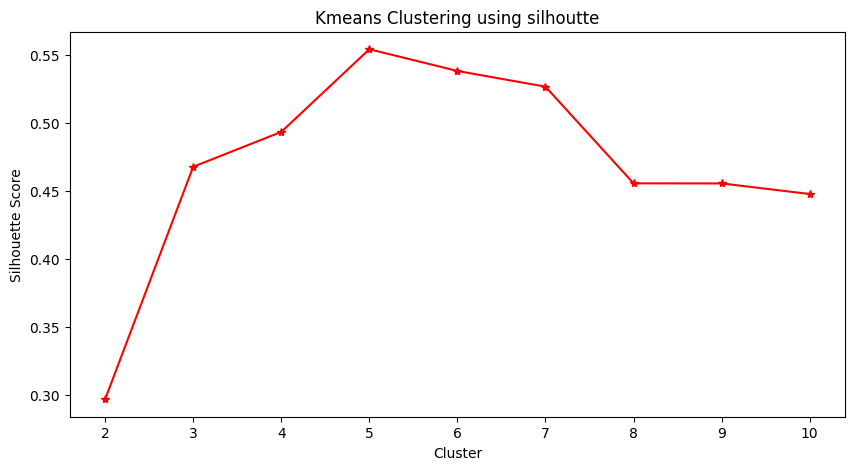

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_scores=[]
for i in range(2,11):
    kmeans=KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=200,
        tol=0.0001,
        random_state=0
    )
    cluster_label=kmeans.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_label)
    silhouette_scores.append(silhouette_avg)
plt.figure(figsize=(10,5))
plt.plot(range(2,11),silhouette_scores,marker='*',linestyle='-',color='red')
plt.title('Kmeans Clustering using silhoutte')
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.show()

In [8]:
optimal_num_cluster=silhouette_scores.index(max(silhouette_scores))+2

In [9]:
kmeans=kmeans=KMeans(
        n_clusters=optimal_num_cluster,
        init='k-means++',
        n_init=10,
        max_iter=200,
        tol=0.0001,
        random_state=0
    )
y_means=kmeans.fit_predict(X)

ValueError: x and y must be the same size

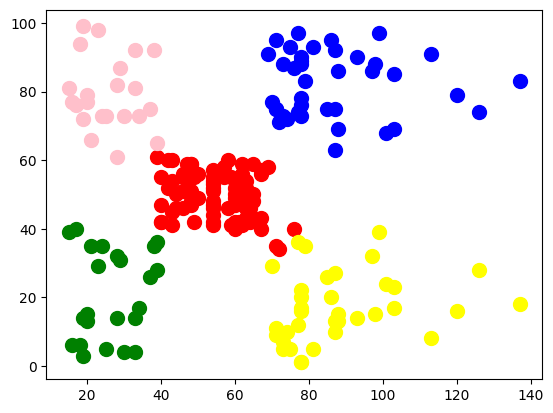

In [10]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100,color='red',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100,color='blue',label='Cluster1')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=100,color='yellow',label='Cluster1')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=100,color='green',label='Cluster1')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=100,color='pink',label='Cluster1')
plt.scatter(kmeans.cluster_centers_[:0],kmeans.cluster_centers_[:1],s=300,c='orange',label='centroid')
plt.title("Silhouette Clustering ")
plt.xlabel('income')
plt.ylabel('spending score')
plt.show()